In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
from scipy import signal
import tkinter as tk
from tkinter import filedialog
import pathlib
from pathlib import Path
import os
import time
import librosa
import IPython.display as ipd
from librosa import display
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import math

# Regression Algorithms 
## Random Forest Regression

In [2]:
def downloadData(name):
    ## Download Data
    cwd = Path.cwd()
    file_path = Path(cwd).joinpath(r'Unit4', name)
    return pd.read_csv(file_path)

In [3]:
Operationsdf = downloadData("Bolt1Operationdf.csv")
Regulationdf = downloadData("Bolt1Regulationdf.csv")
Startdf =  downloadData("Bolt1Startdf.csv")

## Split to X and Y from Dataframe

In [4]:
    def getXandY(dataframe): 
        answer = list(dataframe['Bolt_1_Tensile'])
        Df = dataframe.drop(columns = ['Bolt_1_Tensile'],axis=1)
        return Df, answer

In [5]:
operationX, operationY = getXandY(Operationsdf)
regulationX, regulationY = getXandY(Regulationdf)
StartX, StartY = getXandY(Startdf)

## Split to training data and Scale


In [6]:
X_trainOperation, X_testOperation, y_trainOperation, y_testOperation = train_test_split(
        operationX, operationY, test_size=0.33,shuffle=False)

X_trainRegulation, X_testRegulation, y_trainRegulation, y_testRegulation = train_test_split(
        regulationX, regulationY, test_size=0.33,shuffle=False)

X_trainStart, X_testStart, y_trainStart, y_testStart = train_test_split(
        StartX, StartY, test_size=0.33,shuffle=False)



In [7]:
def scaleData(Xtrain,Xtest):
    scaler = StandardScaler()
    scaler.fit(Xtrain)
    scaledTrainingData = scaler.transform(Xtrain)
    scaler.fit(Xtest)
    scaledTestData = scaler.transform(Xtest)
    return scaledTrainingData, scaledTestData,scaler

In [8]:
OperationTrainingData, OperationTestData,OperationScaler = scaleData(X_trainOperation,X_testOperation)
RegulationTrainingData, RegulationTestData, RegulationScaler = scaleData(X_trainRegulation,X_testRegulation)
StartTrainingData, StartTestData, StartScaler = scaleData(X_trainStart,X_testStart)

## Plot Scaled Data

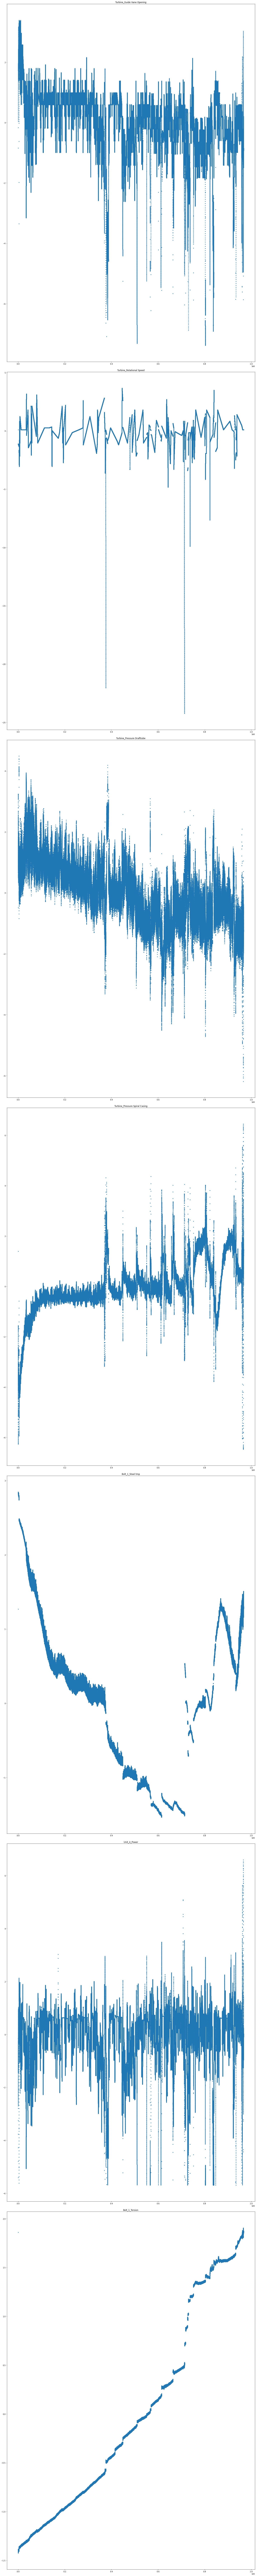

In [9]:
##Operation
fig, axs = plt.subplots(len(OperationTrainingData[0]), figsize = (20, 200))
Traintime = np.linspace(0,len(OperationTrainingData),len(OperationTrainingData), dtype = 'int')
axs = axs.flatten()
for i in range(0,len(axs)):
    currentData = []
    for num in Traintime-1:
        currentData.append(OperationTrainingData[num][i])
    axs[i].scatter(Traintime, currentData, marker = ".")
    axs[i].set_title(operationX.columns[i])
fig.tight_layout()
plt.show()

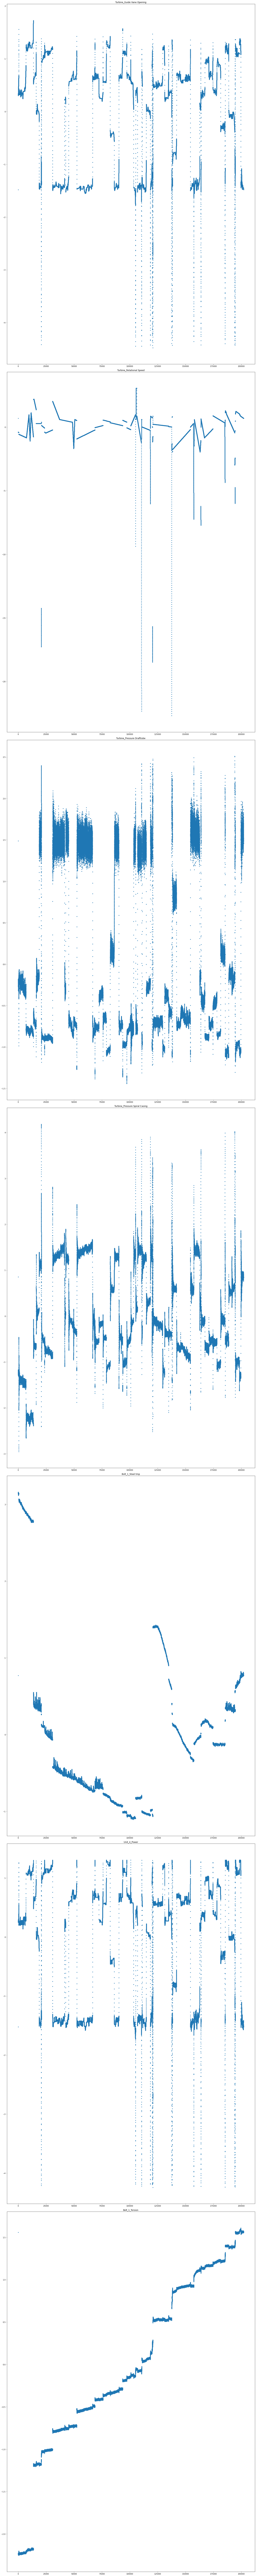

In [10]:
##Regulation
fig, axs = plt.subplots(len(RegulationTrainingData[0]), figsize = (20, 200))
Traintime = np.linspace(0,len(RegulationTrainingData),len(RegulationTrainingData), dtype = 'int')
axs = axs.flatten()
for i in range(0,len(axs)):
    currentData = []
    for num in Traintime-1:
        currentData.append(RegulationTrainingData[num][i])
    axs[i].scatter(Traintime, currentData, marker = ".")
    axs[i].set_title(regulationX.columns[i])
fig.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

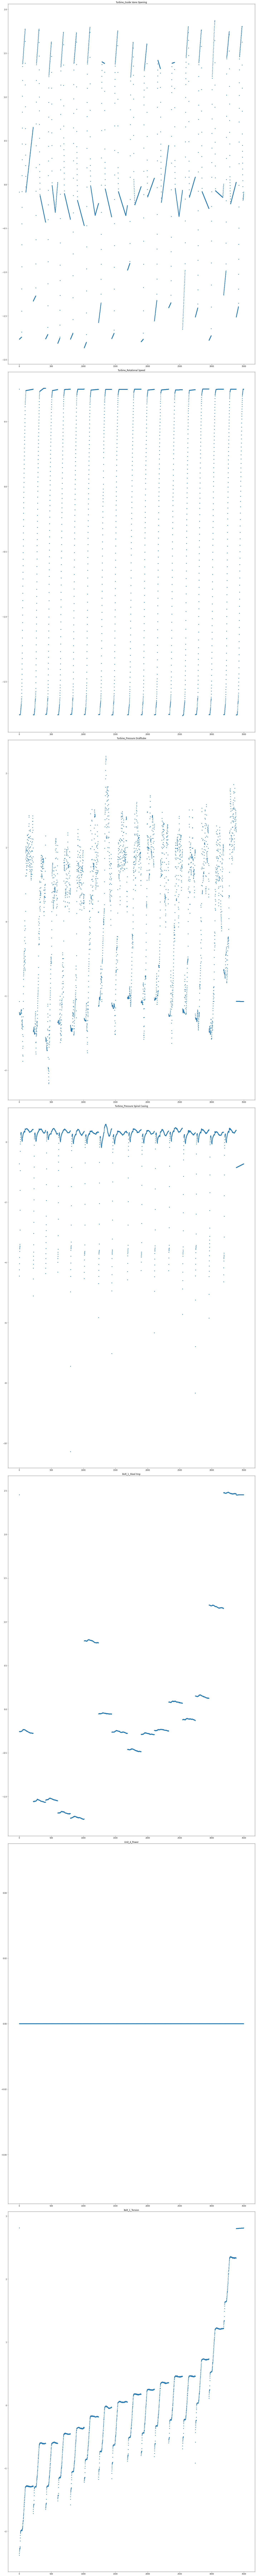

In [11]:
##Start
fig, axs = plt.subplots(len(StartTrainingData[0]), figsize = (20, 200))
Traintime = np.linspace(0,len(StartTrainingData),len(StartTrainingData), dtype = 'int')
axs = axs.flatten()
for i in range(0,len(axs)):
    currentData = []
    for num in Traintime-1:
        currentData.append(StartTrainingData[num][i])
    axs[i].scatter(Traintime, currentData, marker = ".")
    axs[i].set_title(StartX.columns[i])
fig.tight_layout()
plt.show

## Use RandomForestRegressor

In [12]:
#Operation
OperationTrainingData = np.array(OperationTrainingData)
tic = time.time()
regrOperation = RandomForestRegressor(random_state=0, n_jobs = -1)
regrOperation.fit(OperationTrainingData, y_trainOperation)
toc = time.time()
print(toc-tic)

#Regulation
RegulationTrainingData = np.array(RegulationTrainingData)
tic = time.time()
regrRegulation = RandomForestRegressor(random_state=0, n_jobs = -1)
regrRegulation.fit(RegulationTrainingData, y_trainRegulation)
toc = time.time()
print(toc-tic)

#Start
StartTrainingData = np.array(StartTrainingData)
tic = time.time()
regrStart = RandomForestRegressor(random_state=0, n_jobs = -1)
regrStart.fit(StartTrainingData, y_trainStart)
toc = time.time()
print(toc-tic)

171.46300053596497
35.17599678039551
0.36750006675720215


In [13]:
#Operation
y_predictOperation = regrOperation.predict(OperationTestData)
MSEOperation = mean_squared_error(y_testOperation, y_predictOperation)

#Regulation
y_predictRegulation = regrRegulation.predict(RegulationTestData)
MSERegulation = mean_squared_error(y_testRegulation, y_predictRegulation)

#Start
y_predictStart = regrStart.predict(StartTestData)
# 
MSEStart = mean_squared_error(y_testStart, y_predictStart)
print(MSEOperation)
print(MSERegulation)
print(MSEStart)

299.8576591270051
432.14322125389896
546.4892143821737


In [14]:
#Mean error for three models
print((MSEOperation + MSERegulation + MSEStart )/3)

426.1633649210259


## Plot tredicted vs Acctual

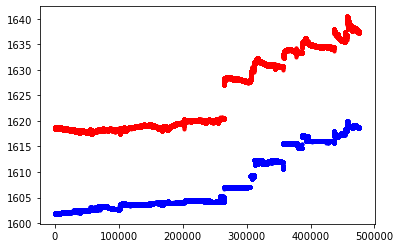

In [15]:
Testtime = np.linspace(0,len(y_predictOperation),len(y_predictOperation),dtype='int')
plt.scatter(Testtime, y_predictOperation, marker = ".",color = 'b')
plt.scatter(Testtime, y_testOperation, marker = ".",color = 'r')
plt.show()

it looks like a constant is need to be added to give a correct prediction

In [16]:
y_testOperation[0] - y_predictOperation[0]

16.760400062851886

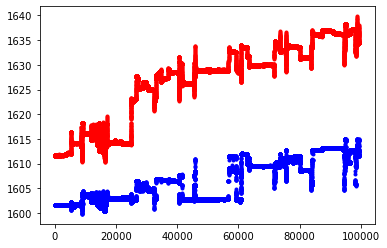

In [17]:
Testtime2 = np.linspace(0,len(y_predictRegulation),len(y_predictRegulation),dtype='int')
plt.scatter(Testtime2, y_predictRegulation, marker = ".",color = 'b')
plt.scatter(Testtime2, y_testRegulation, marker = ".",color = 'r')
plt.show()

In [18]:
y_predictRegulation[20] - y_testRegulation[20]

-10.028470609382339

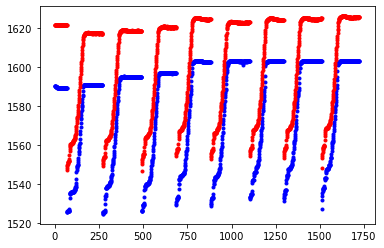

In [19]:
Testtime2 = np.linspace(0,len(y_predictStart),len(y_predictStart),dtype='int')
plt.scatter(Testtime2, y_predictStart, marker = ".",color = 'b')
plt.scatter(Testtime2, y_testStart, marker = ".",color = 'r')
plt.show()

In [20]:
y_predictStart[20] - y_testStart[20] 

-32.150872886115394

# Predict the Test Data from Unit 4

In [21]:
cwd = Path.cwd()
file_path = Path(cwd).joinpath(r'Unit4', 'input_dataset-2.parquet')
print(file_path)
tic = time.time()
df = pd.read_parquet(file_path)
toc = time.time()
print("Load Time:",toc-tic)

C:\Users\100cgj\OneDrive - Sysco AS\Dokumenter\Hackaton\krafthack2022onsite\Unit4\input_dataset-2.parquet
Load Time: 1.0430433750152588


## Plot the Test Data from Unit 4

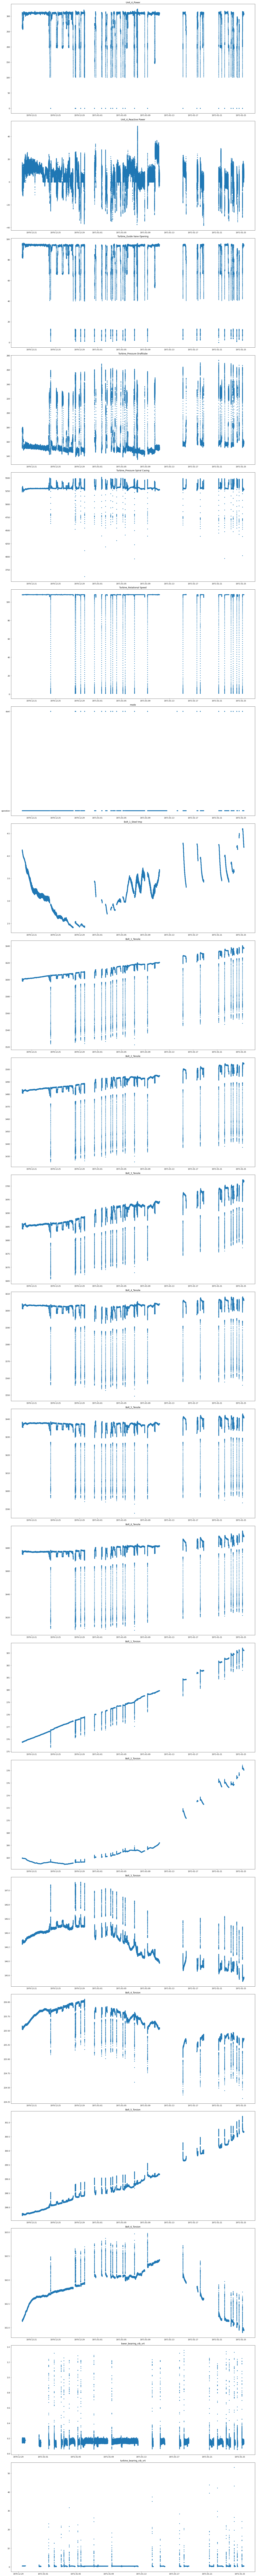

In [22]:
fig, axs = plt.subplots(df.shape[1], figsize = (20, 200))
axs = axs.flatten()
for i in range(0,len(axs)):
    axs[i].scatter(df.index, df.iloc[0::,i], marker = ".")
    axs[i].set_title(df.columns[i])
fig.tight_layout()
plt.show()

In [23]:
bolt1Columns=['Turbine_Guide Vane Opening',
              'Turbine_Rotational Speed',
              'Turbine_Pressure Drafttube',
              'Turbine_Pressure Spiral Casing',
              'mode', 
              'Bolt_1_Steel tmp',
              'Unit_4_Power', 
              'Bolt_1_Torsion']

In [24]:
bolt1Df =  df[bolt1Columns].copy()

In [25]:
dataBolt1 = []
for x in bolt1Columns:
    dataBolt1.append(bolt1Df[x])
time = np.linspace(0,bolt1Df.shape[0],bolt1Df.shape[0])

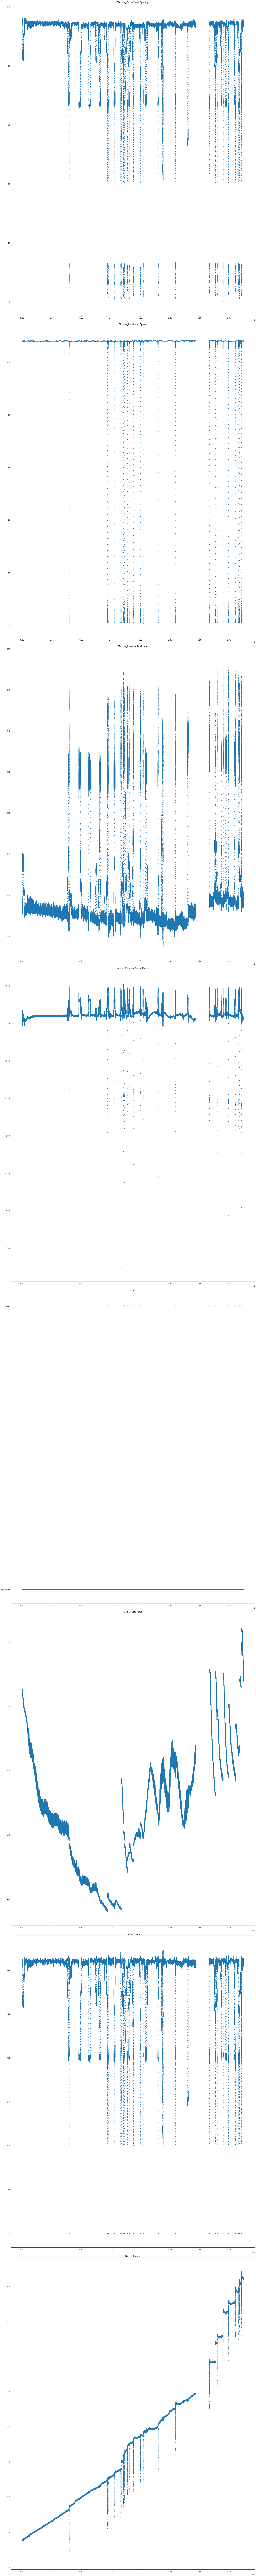

In [26]:
fig, axs = plt.subplots(len(dataBolt1), figsize = (20, 200))
axs = axs.flatten()
for i in range(0,len(axs)):
    axs[i].scatter(time,dataBolt1[i], marker = ".")
    axs[i].set_title(bolt1Columns[i])
fig.tight_layout()
plt.show()

## Divide into start, Operation and Regulation

In [27]:
Bolt1Startdf = bolt1Df.copy(deep=True)
IndicesToChange = Bolt1Startdf[Bolt1Startdf['mode'] == 'operation'].index
print(len(IndicesToChange))
Bolt1Startdf.loc[IndicesToChange] = np.array([None for x in range(0,len(Bolt1Startdf.columns))])
Bolt1Startdf = Bolt1Startdf.drop(columns = ['mode'],axis=1)
Bolt1Startdf.shape

1868659


(1874087, 7)

In [28]:
Bolt1Regulationdf = bolt1Df.copy(deep=True)
IndicesToChange = Bolt1Regulationdf[Bolt1Regulationdf['mode'] == 'start'].index
Bolt1Regulationdf.loc[IndicesToChange] = np.array([None for x in range(0,len(Bolt1Regulationdf.columns))])
Bolt1Regulationdf = Bolt1Regulationdf.drop(columns = ['mode'],axis=1)
doNotDrop = ['Bolt_1_Steel tmp','mode','Bolt_1_Torsion', 'Bolt_1_Tensile']
indicesForRegulationMode = []
mean = Bolt1Regulationdf['Unit_4_Power'].mean() # Same as np.percentile but maps (0,1) and not (0,100)
std = Bolt1Regulationdf['Unit_4_Power'].std()
print(mean)
print(std)
# Filter our dataframe based on condition
indicesForRegulationMode = Bolt1Regulationdf[Bolt1Regulationdf['Unit_4_Power'] > mean].index
Bolt1Regulationdf.loc[indicesForRegulationMode] = np.array([None for x in range(0,len(Bolt1Regulationdf.columns))])

298.6450521624742
29.746472665833036


In [29]:
Bolt1Operationdf = bolt1Df.copy(deep=True)
IndicesToChange = list(Bolt1Operationdf[Bolt1Operationdf['mode'] == 'start'].index)
print(type(IndicesToChange))
print(len(IndicesToChange))
Bolt1Operationdf.loc[IndicesToChange] = np.array([None for x in range(0,len(Bolt1Operationdf.columns))])
Bolt1Operationdf = Bolt1Operationdf.drop(columns = ['mode'],axis=1)
mean = Bolt1Operationdf['Unit_4_Power'].mean() # Same as np.percentile but maps (0,1) and not (0,100)
std = Bolt1Operationdf['Unit_4_Power'].std()
print(mean)
print(std)
# Filter our dataframe based on condition
indicesForoperationMode = Bolt1Operationdf[Bolt1Regulationdf['Unit_4_Power'] < mean].index
Bolt1Operationdf.loc[indicesForoperationMode] = np.array([None for x in range(0,len(Bolt1Operationdf.columns))])

<class 'list'>
5428
298.6450521624742
29.746472665833036


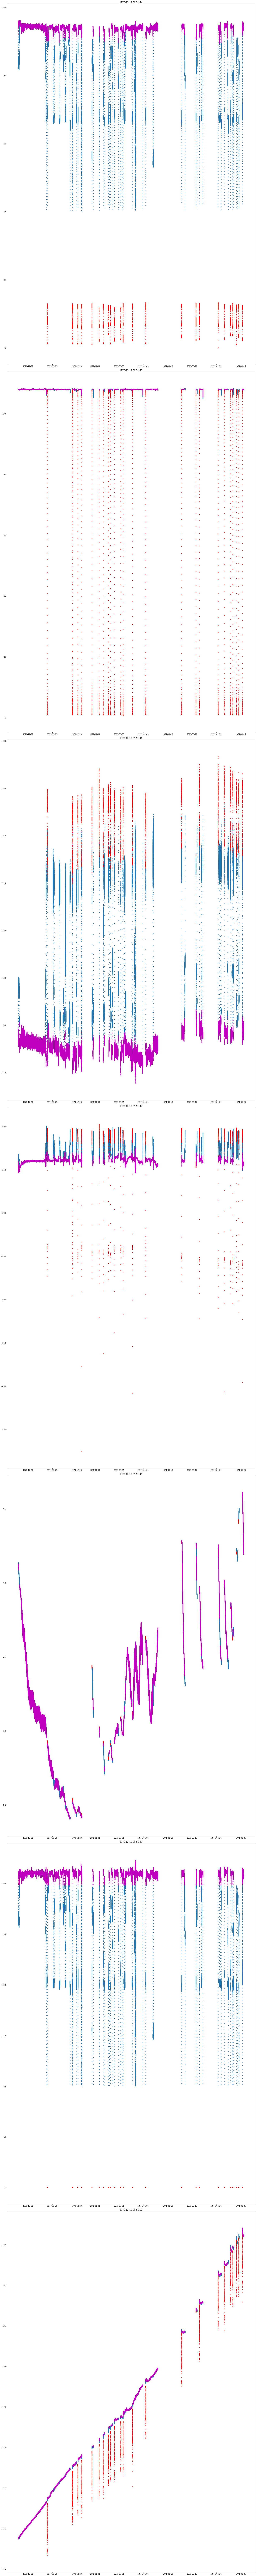

In [30]:
fig, axs = plt.subplots(Bolt1Operationdf.shape[1], figsize = (20, 200))
axs = axs.flatten()
for i in range(0,len(axs)):
    axs[i].scatter(Bolt1Regulationdf.index, Bolt1Regulationdf.iloc[0::,i], marker = ".")
    axs[i].scatter(Bolt1Startdf.index, Bolt1Startdf.iloc[0::,i], marker = ".", color = 'r')
    axs[i].scatter(Bolt1Operationdf.index, Bolt1Operationdf.iloc[0::,i], marker = ".", color = 'm')
    axs[i].set_title(Bolt1Operationdf.index[i])
fig.tight_layout()
plt.show()

In [31]:
#Fit data to scaler used before
TestOperationdf = OperationScaler.transform(Bolt1Operationdf)
TestRegulationdf = RegulationScaler.transform(Bolt1Regulationdf)
TestStartdf = RegulationScaler.transform(Bolt1Startdf)
placeholdersforTension= np.zeros(TestOperationdf.shape[0])

In [32]:
OperationIndices = []
for i in range(0,len(TestOperationdf)):
    if True not in np.isnan(TestOperationdf[i]):
              OperationIndices.append(i) 
OperationTestX = [x for x in TestOperationdf if True not in np.isnan(x)]

RegulationIndices = []
for i in range(0,len(TestRegulationdf)):
    if True not in np.isnan(TestRegulationdf[i]):
              RegulationIndices.append(i) 
RegulationTestX = [x for x in TestRegulationdf if True not in np.isnan(x)]

StartIndices = []
for i in range(0,len(TestStartdf)):
    if True not in np.isnan(TestStartdf[i]):
              StartIndices.append(i) 
StartTestX = [x for x in TestStartdf if True not in np.isnan(x)]

In [33]:
#Operation
y_predictOperation = regrOperation.predict(OperationTestX)

#Regulation
y_predictRegulation = regrRegulation.predict(RegulationTestX)

#Start
y_predictStart = regrStart.predict(StartTestX)

In [34]:
for index,value in zip(OperationIndices,y_predictOperation):
    placeholdersforTension[index] = value + 16 
    
for index,value in zip(OperationIndices,y_predictRegulation):
    placeholdersforTension[index] = value + 10 
    
for index,value in zip(OperationIndices,y_predictStart):
    placeholdersforTension[index] = value + 32

In [35]:
print(len(placeholdersforTension))
print(bolt1Df.shape)

1874087
(1874087, 8)


Append to Dataframe

In [36]:
bolt1Df["Bolt1_Tension"] = placeholdersforTension

<AxesSubplot:xlabel='timepoints'>

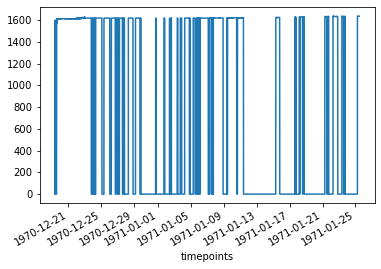

In [37]:
bolt1Df["Bolt1_Tension"].plot()

In [38]:
bolt1tension = bolt1Df["Bolt1_Tension"]
bolt1tension.to_csv('Unit4/Bolt1Prediction.csv', index=False)